In [6]:
import os, time, sys, torch
import matplotlib.pyplot as plt
import numpy as np
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.evaluation.test_loop import play_env
from src.utils.model_handling import load_model, get_model_device, get_model_dataset, load_checkpoint, get_model_cfg_from_checkpoint
from src.utils.visualization import plot_rewards_tep
from src.hpo.custom_fitness_functions import evaluate_lander_performance, evaluate_fitness_with_AUC

In [7]:
project_root = os.path.abspath(os.path.join(os.getcwd(), '../'))

In [4]:
model_id = '4a5u7'
rand_seed = 1003

In [5]:
# Instantiate model
# -------------------------------------------
model = load_model(model_id=model_id)
device = get_model_device(model_id=model_id)

In [ ]:
dataset_name = get_model_dataset(model_id=model_id) # dataset (.pt) file used for training.
dataset = torch.load(os.path.join(project_root, 'data', 'processed', dataset_name), weights_only=False)

In [7]:
checkpoint = load_checkpoint(model_id=model_id)
model_cfg = get_model_cfg_from_checkpoint(checkpoint)

In [8]:
print(f'training_seq_len: ', model_cfg.training_seq_len)
print(f'embedding_dim: ', model_cfg.embedding_dim)
print(f'num_attention_heads: ', model_cfg.num_attention_heads)
print(f'intermediate_dim: ', model_cfg.intermediate_dim)
print(f'hidden_dropout_prob: ', model_cfg.hidden_dropout_prob)
print(f'depth: ', model_cfg.depth)
print(f'seed: ', model_cfg.seed)

training_seq_len:  16
embedding_dim:  128
num_attention_heads:  8
intermediate_dim:  256
hidden_dropout_prob:  0.2
depth:  6
seed:  3


In [13]:
models = os.listdir(os.path.join(project_root, 'results', 'models'))
for idx, model in enumerate(models):
    checkpoint = load_checkpoint(model_id=model)
    model_cfg = get_model_cfg_from_checkpoint(checkpoint)
    print(f'{idx} model: {model}, ', model_cfg.depth, model_cfg.seed)

0 model: 187ii,  6 4
1 model: 18lt6,  6 8
2 model: 4a5u7,  6 3
3 model: 5f8j7,  6 2
4 model: 7d2y4,  6 5
5 model: 7q7u1,  6 6
6 model: b030c,  6 0
7 model: p731l,  6 9
8 model: s26e1,  6 7
9 model: w5p78,  6 1


In [92]:
frames, reward_per_step, states, terminated, truncated = play_env(device, rand_seed, model, dataset, None, model_cfg.training_seq_len)

AttributeError: 'str' object has no attribute 'eval'

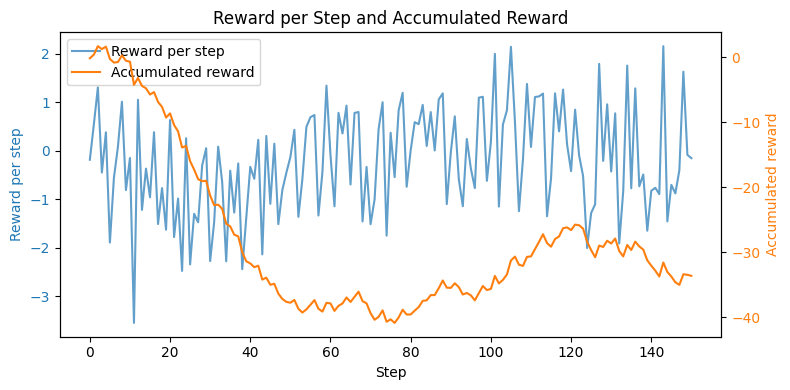

In [ ]:
plot_rewards_tep(reward_per_step[:-10])

In [ ]:
fitness = evaluate_lander_performance(states[-1], reward_per_step)
fitness

np.float64(-0.1571231656426689)

In [ ]:
fitness = evaluate_fitness_with_AUC(states[-1], reward_per_step)
fitness

np.float64(-0.08748151934377335)